Problem Statement : 

        1. Predict future storage of the reservoir 
        2. Why inflow in July,2022 is negative ?

The construction of Glen Canyon Dam in 1964 created Lake Powell. (an artificial reservoir) Both are located in north-central Arizona near the Utah border. Lake Powell acts as a holding tank for outflow from the Colorado River Upper Basin States: Colorado, New Mexico, Utah and Wyoming.

Water source of Colorado River -> La Poudre Pass Lake located in the Rocky Mountains of northern Colorado in the United States


Data source : https://www.kaggle.com/datasets/johnyoungsorensen/lake-powell-water-level

In [1]:
# download data in google colab
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download johnyoungsorensen/lake-powell-water-level
 

  0% 0.00/2.07M [00:00<?, ?B/s]
100% 2.07M/2.07M [00:00<00:00, 107MB/s]


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
! unzip /content/lake-powell-water-level.zip

Archive:  /content/lake-powell-water-level.zip
  inflating: Lake Powell Updated.csv  
  inflating: Lake Powell.csv         


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams["figure.figsize"] = (12,10)
#plt.rcParams.update({'figure.figsize': (20,10)}) 

In [ ]:
# import os
# for dirname, _, filenames in os.walk('/content/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [5]:
df = pd.read_csv('/content/Lake Powell.csv')
print(df.shape)
df.rename(columns={'datetime':'Date'},inplace=True)
df.index = pd.to_datetime(df['Date'])
df.head(5)

(21665, 11)


Date    inflow  total release  evaporation  bank storage  \
Date                                                                         
1963-03-11  1963-03-11  4751.424            NaN          NaN           NaN   
1963-03-12  1963-03-12  4680.234            NaN          NaN           NaN   
1963-03-13  1963-03-13  4645.656            NaN          NaN           NaN   
1963-03-14  1963-03-14  4748.373         1300.0          0.0           NaN   
1963-03-15  1963-03-15  4730.067         1260.0          0.0           NaN   

            storage  unregulated inflow  pool elevation  power release  area  \
Date                                                                           
1963-03-11      NaN                 NaN             NaN            NaN   NaN   
1963-03-12      NaN                 NaN             NaN            NaN   NaN   
1963-03-13      NaN                 NaN             NaN            NaN   NaN   
1963-03-14      NaN                 NaN             NaN            NaN   NaN   
1963-03-15      NaN                 NaN             NaN            NaN   NaN   

            bypass release  
Date                        
1963-03-11             NaN  
1963-03-12             NaN  
1963-03-13             NaN  
1963-03-14             NaN  
1963-03-15             NaN

## Group data into category 

grouping similar kind of data into one category helps us to check the relative 
trend -> so we're grouping data in mainly 3 category 
    1. inflow
    2. outflow
    3. storage
 
later we can formulate flow equation from this quantity

In [ ]:
fig = px.line(df,x='Date',y=['inflow','unregulated inflow'],title='inflow features')

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
                     buttons=list([
                                    dict(count=1,label='1y',step='year',stepmode='backward'),
                                    dict(count=4,label='5y',step='year',stepmode='backward'),
                                    dict(count=9,label='10y',step='year',stepmode='backward'),
                                    dict(label='all',step='all')])
                                    )
                )
fig.show()

Every Year starting 2nd week of March ~ Last week of July there is an increase of inflow , but if we look carefully the actual increase is during May ~ July that is the end of spring & beginning of summer(at northern Colorado,USA)


https://www.nrel.colostate.edu/wp-content/uploads/2018/01/Story-Map-PDF.pdf

Data from here shows that snow accumulates during end of November ~ end of June & starting of May ~ end of August is the discharge(snow melting,water inflow time) -> This perfectly describe the overall inflow data.

**But there is a unexpected -ve inflow during Jul,2022 -> Need to investigate that**

In [6]:
fig = px.line(df,x='Date',y=['total release','bypass release','evaporation'],title='outflow features')

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
                     buttons=list([
                                    dict(count=1,label='1y',step='year',stepmode='backward'),
                                    dict(count=4,label='5y',step='year',stepmode='backward'),
                                    dict(count=9,label='10y',step='year',stepmode='backward'),
                                    dict(label='all',step='all')])
                                    )
                )
fig.show()

Since 2000 we're getting periodic total release & starting from 2005 November is the time for 'bypass release' but during March,2008 there is an exception for a bypass release . 

July ~ September and November ~ February is one of the discharge cycle on every year after 2000 , but there are other discharge cycles too

Every year June 1st week ~ December 2nd week we see periodic Evaporation.

**But during July,2022 we don't see a rise in Eveporation , as there was -ve inflow we can conclude evaporation didn't take place**

In [7]:
fig = px.line(df,x='Date',y=['storage','bank storage','pool elevation','area','power release'],title='sorage features')

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
                     buttons=list([
                                    dict(count=1,label='1y',step='year',stepmode='backward'),
                                    dict(count=4,label='5y',step='year',stepmode='backward'),
                                    dict(count=9,label='10y',step='year',stepmode='backward'),
                                    dict(label='all',step='all')])
                                    )
                )
fig.show()

Pool Elevation,Area,Power Release is flat during this whole timeframe.

After 1979 Bank storage has plateaued

After 2005 we can see the storage level decreased compared to 1979 ~ 2002 , We see rise in storage during June ~ July & fall in storage at April ~ May

1st not NaN value for bypass release is on 2004-06-03 

**But on Jun,2022 we see a increase in storage almost 1/2 compared to previous years**

## Fill missing Value

here we can't use rolling window mean as there are lot's of missing value at the beginning so if we use large window size we might miss the pattern . If we use rolling window from backward the result will be same when we reach at the beginning

In [8]:
df.isnull().sum()*100/df.shape[0]

Date                   0.000000
inflow                 0.000000
total release          0.013847
evaporation            0.013847
bank storage           0.503116
storage                0.503116
unregulated inflow     0.507731
pool elevation         1.347796
power release          1.347796
area                   1.347796
bypass release        69.513039
dtype: float64

In [9]:
df1=df.copy(deep=True)

In [10]:
df1 = df1.fillna(method='bfill')
df1.isnull().sum()

Date                  0
inflow                0
total release         0
evaporation           0
bank storage          0
storage               0
unregulated inflow    0
pool elevation        0
power release         0
area                  0
bypass release        0
dtype: int64

**Lets analyse the Trend,Seasonality,Residual error of few elements -> inflow,total release,storage**

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose,DecomposeResult

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [12]:
def plot_seasonal_decompose(result:DecomposeResult, dates:pd.Series=None, title:str="Seasonal Decomposition"):
    
    x_values = dates if dates is not None else np.arange(len(result.observed))
    return (
        make_subplots(rows=4,cols=1,subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"],)
        .add_trace(
            go.Scatter(x=x_values, y=result.observed, mode="lines", name='Observed',line_color='darkviolet'),row=1,col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.trend, mode="lines", name='Trend',line_color='firebrick'),row=2, col=1,
        )
        .add_trace(go.Scatter(x=x_values, y=result.seasonal, mode="lines", name='Seasonal',line_color='hotpink'),row=3,col=1,
        )
        .add_trace( go.Scatter(x=x_values, y=result.resid, mode="lines", name='Residual',line_color='darkorange'),row=4,col=1,
        )
        .update_layout(
            height=900, title=f'<b>{title}</b>', margin={'t':100}, title_x=0.5, showlegend=False
        )
    )

In [ ]:
decomposition = seasonal_decompose(df1['inflow'], model='additive', period=60)
fig = plot_seasonal_decompose(decomposition, dates=df1.index)
fig.show()

For memory usage commenting out the followings

In [13]:
# decomposition = seasonal_decompose(df1['storage'], model='additive', period=60)
# fig = plot_seasonal_decompose(decomposition, dates=df1.index)
# fig.show()

In [14]:
# decomposition = seasonal_decompose(df1['total release'], model='additive', period=60)
# fig = plot_seasonal_decompose(decomposition, dates=df1.index)
# fig.show()

## Exponential smoothing to check denoised data

We add low-pass filters to remove high-frequency noise -> Do exponential smoothing as we can see 

1. seasonality (exist but not for 2 months )
2. trend (inflow - half-year/1 year,storage - 10-12 years,total release - almost regular but some spikes in between)
3. residual(storage - 1 year,total release - irregular 2-3 years)




 


    Alpha: Smoothing factor for the level.

    Beta: Smoothing factor for the trend.

    Gamma: Smoothing factor for the seasonality.

    Trend Type: Additive or multiplicative.

    Dampen Type: Additive or multiplicative.

    Phi: Damping coefficient.

    Seasonality Type: Additive or multiplicative.

    Period: Time steps in seasonal period


In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [16]:
def plot_exponential_smoothing(x,train,valid,alpha,beta,period):
    model = ExponentialSmoothing(train[x], seasonal_periods=period,damped_trend=True,trend='additive',seasonal='additive',freq='D')
    model=model.fit(smoothing_level=alpha, smoothing_trend=beta)
    #model.params_formatted
    prediction = model.forecast(len(valid)).copy()
    holt_resid = pd.DataFrame(valid[x] - prediction,columns=["residual"],index=valid.index)
    holt_s = pd.DataFrame(np.c_[model.level, model.trend, model.season],
                         columns=["level", "slope", "seasonal"],index=train.index,)

    holt_s[["level"]].plot()
    holt_s[["slope"]].plot()
    holt_s[["seasonal"]].plot()
    holt_resid[["residual"]].plot()
    plot_acf(holt_resid[["residual"]], lags = period)
    plot_pacf(holt_resid[["residual"]], lags = period,method='yw')
    plt.show()


**we can see a regular trend from 2011 , so we take data upto end of 2010 , here we're only checking for 3 major category representatives - inflow,outflow & storage**

In [17]:
cutoff_date = '2010-12-31'
train, valid  = df1.loc[df1.index <= cutoff_date], df1.loc[df1.index > cutoff_date]
print(train.shape, valid.shape)

(17463, 11) (4202, 11)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning:

The 'freq' argument in Timestamp is deprecated and will be removed in a future version.



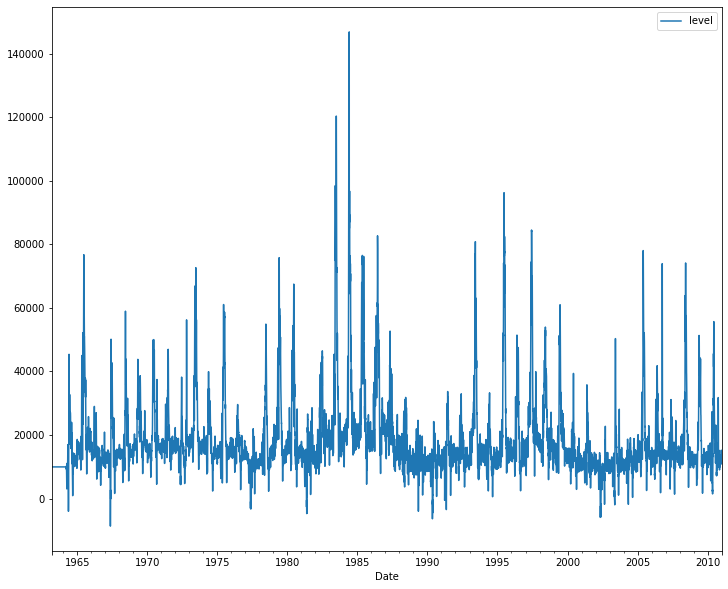

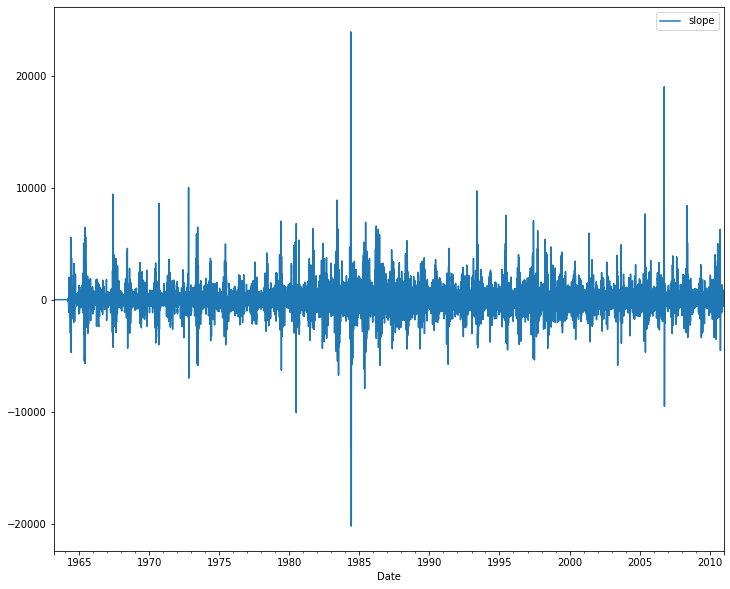

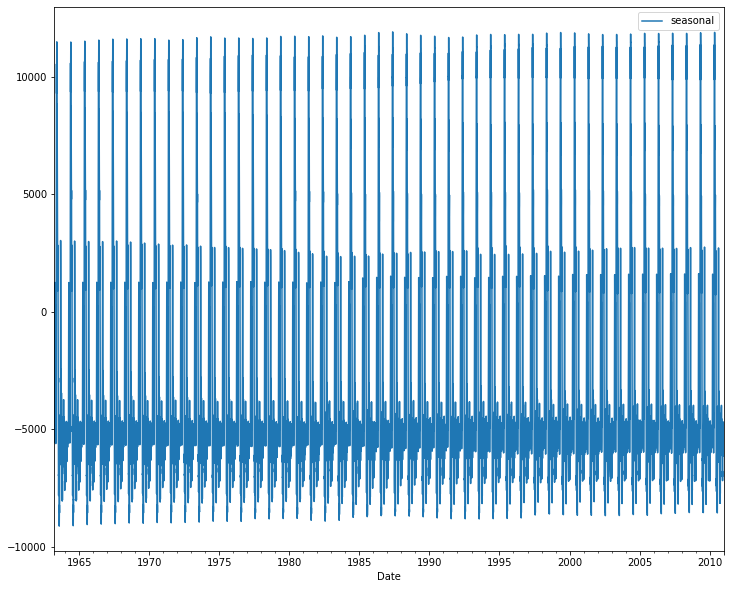

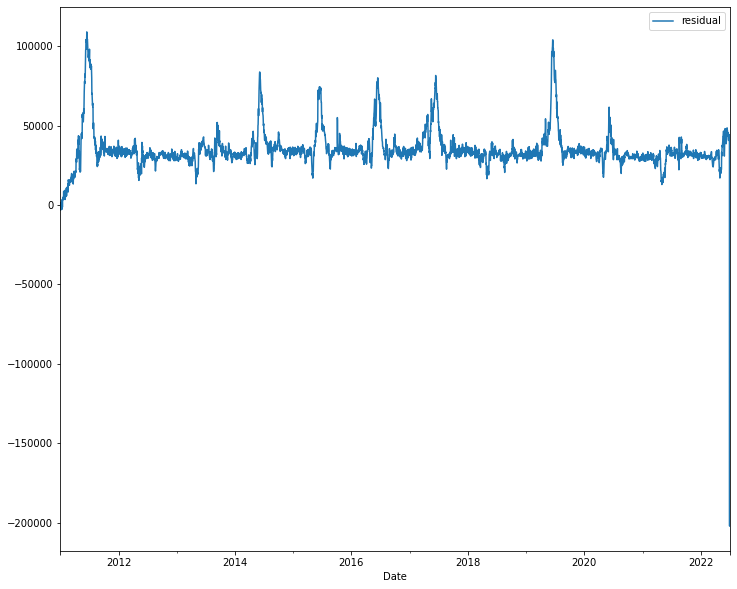

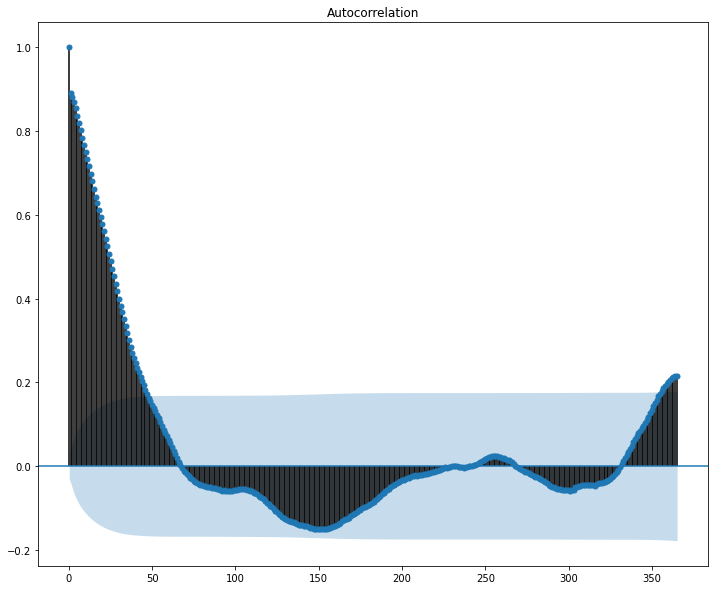

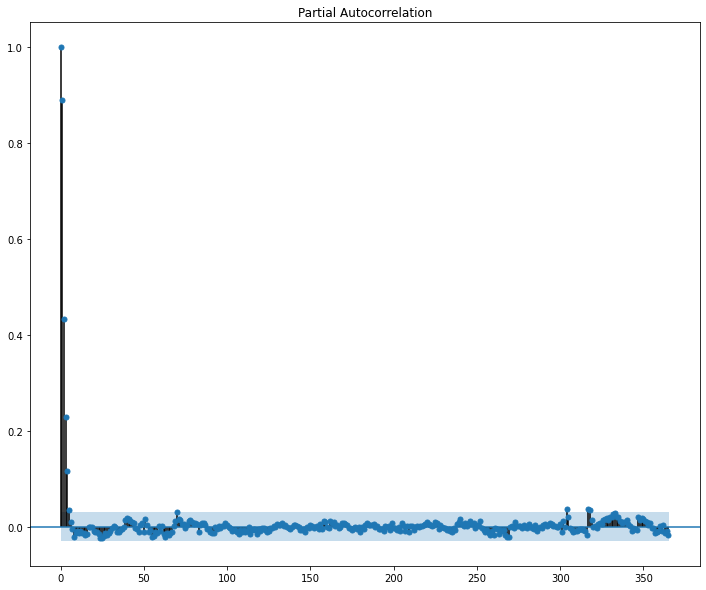

In [18]:
plot_exponential_smoothing('inflow',train,valid,0.5,0.5,365) # alpha,beta,period ~ 1 year In terms of days

In [19]:
#plot_exponential_smoothing('total release',train,valid,0.6,0.5,730) # 2 years

In [20]:
# Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 3650 must be < 2101.
#plot_exponential_smoothing('storage',train,valid,0.7,0.6,2100) # 5.7 years

## Fine tune trend

Here we're avoiding adf or kpss test for stationary check , As we can very well see the trend but there is noise too lets do some transformation
 1. using differencing to remove trend -> seasonal decomposition showing clear yearly trend
 2. check outliers if they're following some trend or not

(21658, 2)


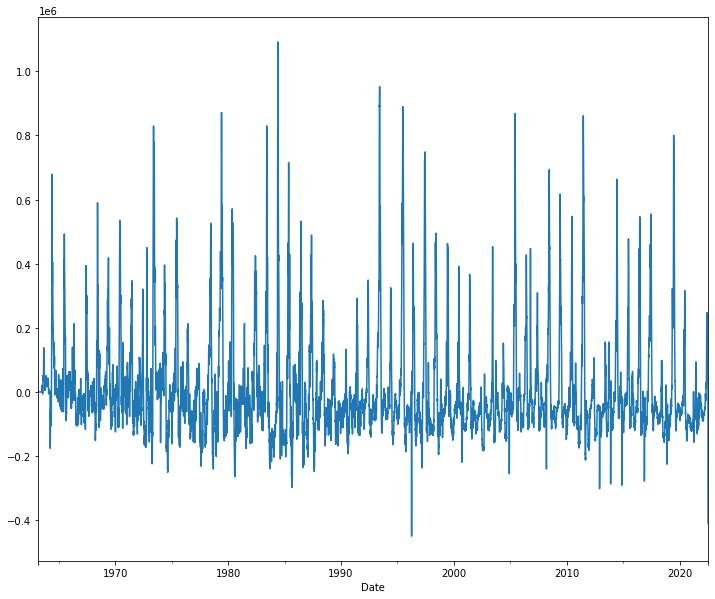

In [21]:
df2 = df1['storage'].diff(periods=7)
df2=pd.DataFrame(df2,columns=['storage'])
df2['Date'] = df2.index
df2=df2[7:]
print(df2.shape)
df2['storage'].plot()

## Check outliers

Here outlier is a function of time not necessarily amplitude which means - for inflow 
if we observe high value during May ~ July that is not outlier but even a low 
value during off season like November ~ June even low inflow will be considered a 
outlier -> The reason for that is most likely rise in average temparature 

In [22]:
def check_outlier(df1,window_size,x):
    
    xroll = df1[x].rolling(window_size)
    df1['mean_roll_'+x] = xroll.mean()
    df1['sd_roll_'+x] = xroll.std()
    df1['zscore_'+x] = np.abs((df1[x] - df1['mean_roll_'+x]) / df1['sd_roll_'+x])
    df2=df1.loc[df1['zscore_'+x] > 3][['Date',x]] #outlier
    #print(df2)
    fig = px.scatter(x=df2['Date'],y=df2[x])
    fig.update_xaxes(rangeslider_visible=True,
                     rangeselector=dict(
                         buttons=list([
                                        dict(count=1,label='1y',step='year',stepmode='backward'),
                                        dict(count=4,label='5y',step='year',stepmode='backward'),
                                        dict(count=9,label='10y',step='year',stepmode='backward'),
                                        dict(label='all',step='all')])
                                        )
                    )
    fig.show()

In [23]:
check_outlier(df1,365,'inflow') # 1 year

For inflow outliers are on May ~ June , which is exactly the time of the year we observe increase in inflow

In [24]:
#check_outlier(df1,90,'total release') # 2 years

Jan, Jun ~ July , September ~ November these are the discharge cycles , in between we don't see any discharge , so we can say thse are not outliers but trend

In [25]:
#check_outlier(df1,3650,'storage') # 10 years 

Starting from 1st September ~  20th October,1990 we see gradual decrease in water storage , from our previous analysis we can confirm after the year 2000, water reservoir is all time low in 37 years

**Apply differencing for denoising trend of orginal data**

In [26]:
df.fillna(method='bfill',inplace=True)
df.isnull().sum()

cols = ['inflow', 'total release', 'evaporation', 'bank storage',
       'storage', 'unregulated inflow', 'pool elevation', 'power release',
       'area', 'bypass release']
for x in cols:
    df[x]=df[x].diff(7)
df=df[7:]



## Check Correlation between similar features

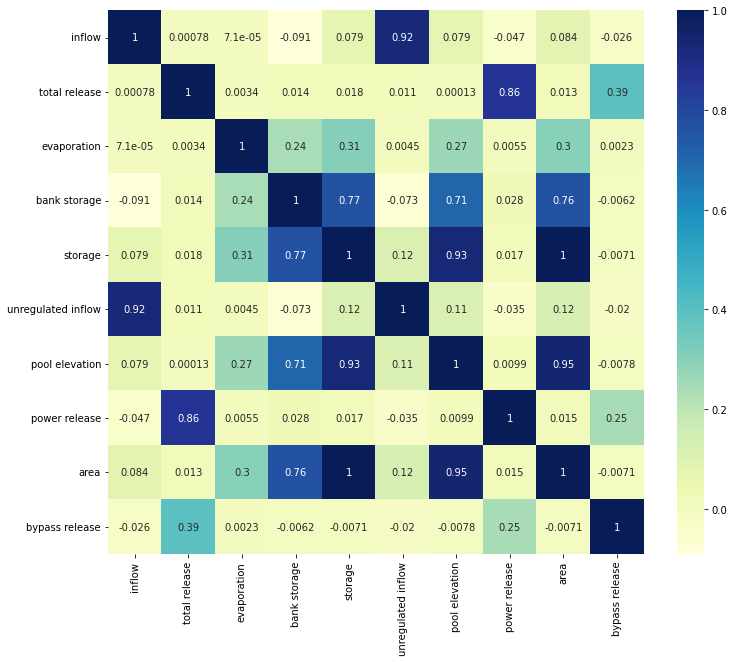

In [27]:
import seaborn as sns 

mat = df[['inflow', 'total release', 'evaporation', 'bank storage',
       'storage', 'unregulated inflow', 'pool elevation', 'power release',
       'area', 'bypass release']].corr()
corr_mat = sns.heatmap(mat, cmap="YlGnBu", annot=True)
plt.show()

1. storage & area & pool elevation is highly correlated
2. bank storage & area has significantly correlated
3. inflow & unregulated inflow is highly correlated
4. total release & power release is highly correlated

So which one we can conside to form Flow Equation ?

Outflow = total release + evaporation + bypass release

Inflow = inflow + unregulated inflow ( though highly correlated but contribution can't be overlooked)

Storage = storage - bank storage -  (final_inflow - final_outflow )

here in case of storage -> we eleminate area & pool elevation


## Creating new feature - Using Flow Equation


Bank storage : water that is absorbed and stored in the bed and banks of a lake -> So we can eleminate this from out usable storage 

Normal Pool elevation : This is the maximum level of water in the reservoir to which the water will rise during ordinary operating conditions. (We have to keep minimum pool elevation)

Max Pool elevation : During floods water starts flowing over the spillways which increase reservior level.
The maximum level attained by water during worst design flood

water level can change -> change in storage capacity = inflow-outflow


    final_inflow = inflow + unregulated inflow 
    
    final_outflow = total release + evaporation + bypass release 
    
    final_storage = storage - bank storage -  final_inflow - final_outflow

In [28]:
df['final_inflow']=df['inflow']+df['unregulated inflow']
df['final_outfow'] = df['total release']+df['evaporation']+df['bypass release']
df['final_storage'] = df['storage'] - df['bank storage'] -  df['final_inflow'] - df['final_outfow']

train = df[:'2022-04-30']
test = df['2022-05-01':]